### Globals

In [16]:
%matplotlib inline
import os
import glob
import subprocess
import sys
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import pickle
import numpy as np

### Retrieve data

In [35]:
pickled_data = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/quad_metrics_ukb.pkl'
# quad_metrics = pickle.load(pickled_data)
with open(pickled_data, 'rb') as f: 
    df_fin = pickle.load(f)   
df_fin.columns = ['Avg_x_tr','Avg_y_tr','Avg_z_tr','Avg_x_rot','Avg_y_rot','Avg_z_rot','Std_EC_x ','Std_EC_y','Std_EC_z', 'Outliers_b1000','Outliers_b1997', 'Outliers_PE_dir','Avg_abs_motion','Avg_rel_motion','Total_outliers']
df_fin

,Avg_x_tr,Avg_y_tr,Avg_z_tr,Avg_x_rot,Avg_y_rot,Avg_z_rot,Std_EC_x,Std_EC_y,Std_EC_z,Outliers_b1000,Outliers_b1997,Outliers_PE_dir,Avg_abs_motion,Avg_rel_motion,Total_outliers
1000432,0.067655,-0.939196,0.114672,-0.005516,-0.000493,0.002742,0.06272,0.058086,0.270621,2.472222,1.611111,1.944444,1.17,0.78,2.041667
1000853,0.017003,-0.585111,-0.34155,0.014469,0.00039,0.000271,0.076919,0.100986,0.252164,0.75,0.111111,0.410053,2.21,2.21,0.430556
1000871,0.089933,0.25977,-0.088388,0.002289,-0.00385,0.002406,0.079946,0.09907,0.320405,1.138889,0.083333,0.582011,0.66,0.72,0.611111
1000910,-0.036212,-1.11116,-0.109127,0.002199,0.001733,-0.000738,0.08531,0.119553,0.267191,0.888889,0.0,0.42328,2.21,2.28,0.444444
1001309,0.02974,0.262508,-0.068946,-0.001847,-0.001499,0.000386,0.097156,0.166894,0.359241,1.416667,0.111111,0.727513,0.75,0.95,0.763889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024203,0.101807,-0.603691,0.224198,0.001211,-0.004055,0.001184,0.064395,0.050533,0.217613,0.694444,0.055556,0.357143,1.01,0.96,0.375
6024607,0.016293,-0.982952,-0.039073,0.001267,0.003334,0.001799,0.064279,0.084206,0.117544,0.972222,0.138889,0.529101,1.21,1.1,0.555556
6024836,0.080954,-1.255294,0.07345,-0.001774,-0.000696,0.000231,0.101629,0.32277,0.23502,0.5,0.0,0.238095,1.6,1.54,0.25
6025056,-0.02552,-0.434727,-0.323077,0.002625,0.004309,0.003158,0.085053,0.063911,0.196396,0.972222,0.027778,0.47619,1.87,2.07,0.5


### Plot histograms

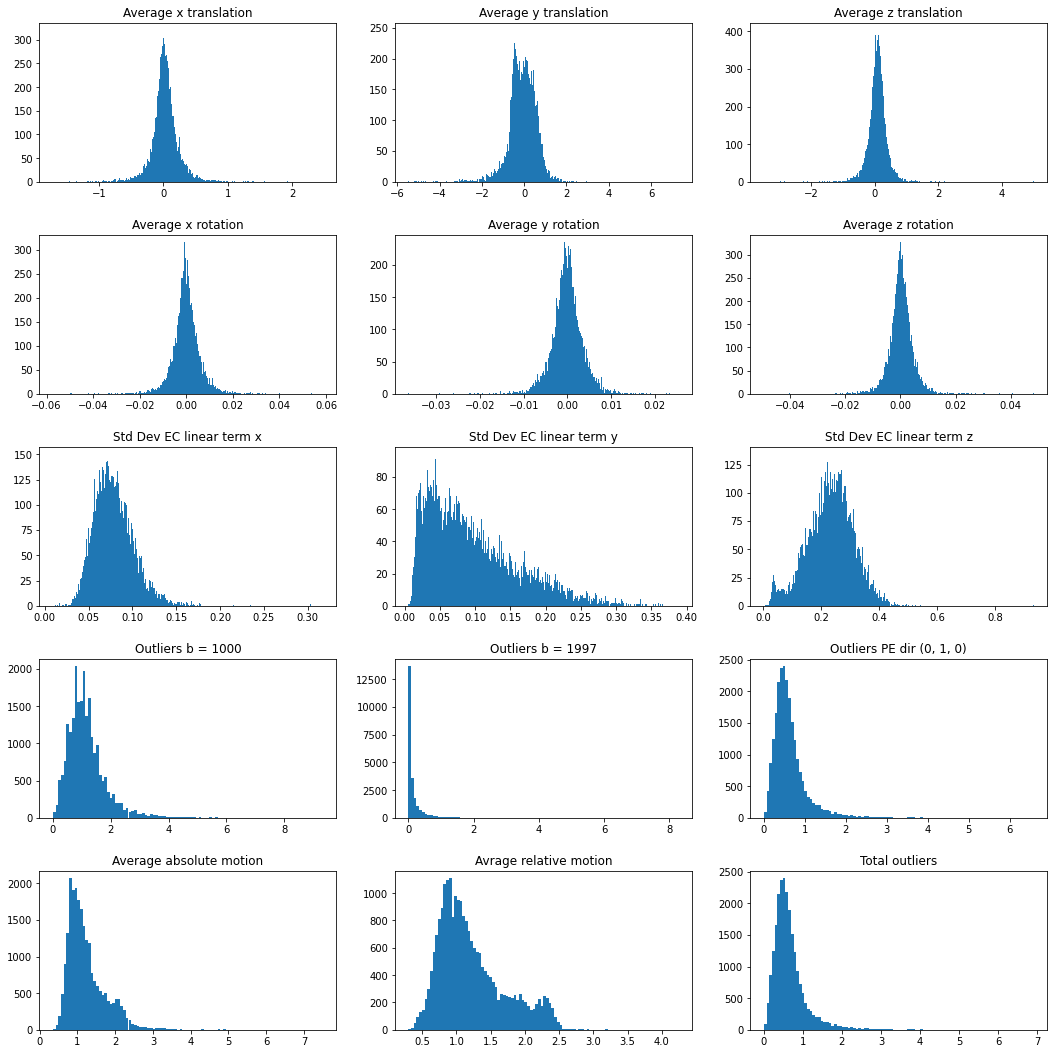

In [14]:
fig1 = plt.figure(figsize=(15, 15))

plt.subplot(5,3,1)
plt.hist(df_fin['Avg x tr'], bins = 1000)
plt.title('Average x translation')

plt.subplot(5,3,2)
plt.hist(df_fin['Avg y tr'], bins = 1000)
plt.title('Average y translation')

plt.subplot(5,3,3)
plt.hist(df_fin['Avg z tr'], bins = 1000)
plt.title('Average z translation')

plt.subplot(5,3,4)
plt.hist(df_fin['Avg x rot'], bins = 1000)
plt.title('Average x rotation')

plt.subplot(5,3,5)
plt.hist(df_fin['Avg y rot'], bins = 1000)
plt.title('Average y rotation')

plt.subplot(5,3,6)
plt.hist(df_fin['Avg z rot'], bins = 1000)
plt.title('Average z rotation')

plt.subplot(5,3,7)
plt.hist(df_fin['Std EC x '], bins = 1000)
plt.title('Std Dev EC linear term x')

plt.subplot(5,3,8)
plt.hist(df_fin['Std EC y'], bins = 1000)
plt.title('Std Dev EC linear term y')

plt.subplot(5,3,9)
plt.hist(df_fin['Std EC z'], bins = 1000)
plt.title('Std Dev EC linear term z')

plt.subplot(5,3,10)
plt.hist(df_fin['Outliers b = 1000'], bins = 100)
plt.title('Outliers b = 1000')

plt.subplot(5,3,11)
plt.hist(df_fin['Outliers b = 1997'], bins = 100)
plt.title('Outliers b = 1997')

plt.subplot(5,3,12)
plt.hist(df_fin['Outliers PE dir (0, 1, 0)'], bins = 100)
plt.title('Outliers PE dir (0, 1, 0)')

plt.subplot(5,3,13)
plt.hist(df_fin['Avg abs motion'], bins = 100)
plt.title('Average absolute motion')

plt.subplot(5,3,14)
plt.hist(df_fin['Avg rel motion'], bins = 100)
plt.title('Avrage relative motion')

plt.subplot(5,3,15)
plt.hist(df_fin['Total outliers'], bins = 100)
plt.title('Total outliers')

fig1.tight_layout(pad = 2)
plt.show()

### PCA for data visualization

In [36]:
import sklearn
from sklearn.decomposition import PCA
df_fin.shape

(23158, 15)

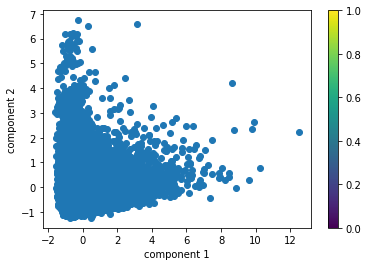

In [43]:
projected = PCA(2).fit_transform(df_fin)
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [50]:
quad_pca2 = pd.DataFrame(projected, columns = ['Component_1', 'Component_2'])
quad_pca2.index = df_fin.index
quad_pca2

,Component_1,Component_2
1000432,2.422874,0.595601
1000853,-0.586974,1.283052
1000871,-0.037650,-0.782894
1000910,-0.562069,1.683464
1001309,0.297802,-0.607729
...,...,...
6024203,-0.672600,0.069821
6024607,-0.332108,0.549617
6024836,-1.020184,1.095222
6025056,-0.367734,0.943641


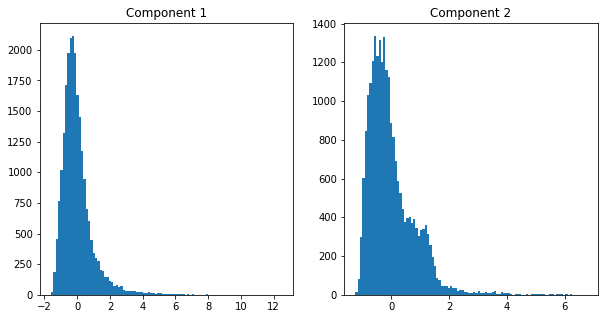

In [57]:
fig1 = plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.hist(quad_pca2['Component_1'], bins = 100)
plt.title('Component 1')

plt.subplot(1,2,2)
plt.hist(quad_pca2['Component_2'], bins = 100)
plt.title('Component 2')

plt.show()

In [59]:
th1_quad_pca2 = quad_pca2.copy(deep=True)
th1_quad_pca2['Component_2'] = quad_pca2['Component_2'].mask(quad_pca2['Component_2']>1)
th1_quad_pca2.dropna(inplace=True)

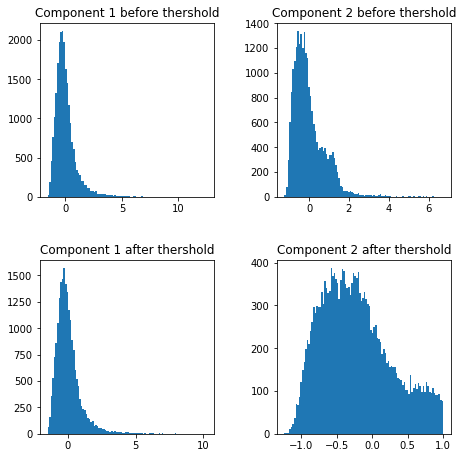

In [67]:
fig2 = plt.figure(figsize=(7, 7))

plt.subplot(2,2,1)
plt.hist(quad_pca2['Component_1'], bins = 100)
plt.title('Component 1 before thershold')

plt.subplot(2,2,2)
plt.hist(quad_pca2['Component_2'], bins = 100)
plt.title('Component 2 before thershold')

plt.subplot(2,2,3)
plt.hist(th1_quad_pca2['Component_1'], bins = 100)
plt.title('Component 1 after thershold')

plt.subplot(2,2,4)
plt.hist(th1_quad_pca2['Component_2'], bins = 100)
plt.title('Component 2 after thershold')

fig2.tight_layout(pad = 3)
plt.show()

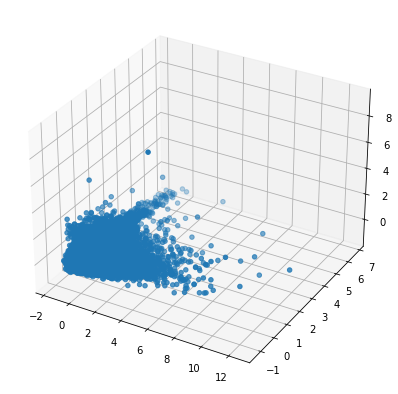

In [42]:
projected = PCA(3).fit_transform(df_fin)
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2])
plt.show()